# 4. Termdocument Matrix 

## 테크 크런치에서 10페이지의 기사 읽어오기 

In [2]:
import requests
import lxml.html

## 기사 목록 가져오는 함수 만들기

### 페이지 넘기기 

In [3]:
page = 2
url = 'https://techcrunch.com/startups/page/{number}'.format(number=page)

In [4]:
url

'https://techcrunch.com/startups/page/2'

 - python 3.6 부터는 다음 문법도 가능하다.
  - f'https://techcrunch.com/startups/page/{page}'

In [6]:
def get_tc_list(page):
    url = 'https://techcrunch.com/startups/page/{number}'.format(number=page)
    res = requests.get(url) # 기사 목록 가지고오기
    root = lxml.html.fromstring(res.text) # 제목 가지고오기
    titles = root.cssselect('h2 a') # 제목 가지고 오기
    for title in titles:
        yield  title.text

In [7]:
get_tc_list(1)

<generator object get_tc_list at 0x0000026A38EC8B48>

## 제네레이터(Generator)란?
 - 리스트를 생성(Generator)하는 함수.list(gen)나 for x in gen 형태로 쓴다. yield 하는 지점에서 한 원소씩 돌려줌. 

In [8]:
list(get_tc_list(1))

['Get your pitch applications in for the Boulder\xa0Micro-Meetup',
 'What do you want to ask SoFi CEO Mike Cagney at Disrupt\xa0NY?',
 'Equity Podcast: Apple and Amazon buy more companies, and Uber’s\xa0saga',
 'Instacart agreed to settle a class-action lawsuit for $4.6\xa0million',
 'Zero Motorcycles CTO Abe Askenazi on the future of two-wheeled\xa0EVs',
 'Post Intelligence says it can make your tweets\xa0better',
 'How Everette Taylor went from a homeless college dropout to chief marketing officer at\xa0Skurt',
 'Revolut launches a premium subscription and starts raising a new\xa0round',
 'Zenreach raises $30M to help businesses boost their marketing with free\xa0Wi-Fi',
 'CALA’s app fits designer clothing to your body using iPhone\xa0photos',
 'A new app lets you list and\xa0Shout',
 'Years after crashing on Travis Kalanick’s couch, this founder has raised $18M for his startup,\xa0Mashape',
 'Lystable takes $10M top-up to tackle freelancer\xa0payments',
 'Italy’s MotorK, a company t

 - "\xa"는 표시가 나온다 => 특수 문자, 16진수 \xa0 > 공백이다. 
  - jupyter notebook with R 에서 나오던 문제점이었다. 
  - nbsp -> Non Breakable Space 

In [46]:
def infinite():
    i = 0 
    while True:
        yield i
        i += 1

In [47]:
infinite() # 한번 실행하고 양보하고 부를때마다 수행하고 양보하는 형태다. list.append를 하게 되면 무한히 수행된다. 

<generator object infinite at 0x0000026A3CB2AD00>

In [48]:
infinite()

<generator object infinite at 0x0000026A3CB2A728>

In [49]:
for x in infinite():
    if x > 5: # 5까지만 수행되고 그만된다. 
        break
    print(x)

0
1
2
3
4
5


## TQDM 
 - 진행막대(Progress Bar)를 보여주는 라이브러리 
 - pip install tqdm으로 설치.

In [9]:
import tqdm

## 기사 수집.

In [10]:
articles = []
for page in tqdm.tqdm_notebook(range(1,30)):
    articles = articles + list(get_tc_list(page))

In [11]:
len(articles)

580

In [12]:
articles[0]

'Get your pitch applications in for the Boulder\xa0Micro-Meetup'

## TDM

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

 - 최대 Features수  : 단어가 최대 1000개 
 - stop_words : am, is, have 와 같은 단어를 제거 

In [21]:
cv = CountVectorizer(max_features=1000, stop_words='english',) 

In [22]:
tdm = cv.fit_transform(articles)

In [60]:
tdm

<580x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 3031 stored elements in Compressed Sparse Row format>

In [23]:
words = cv.get_feature_names()

In [64]:
words[:30]

['000',
 '10',
 '100m',
 '10m',
 '10th',
 '12',
 '12m',
 '15',
 '15m',
 '16',
 '16m',
 '18',
 '1m',
 '2017',
 '21',
 '24',
 '25',
 '26',
 '2m',
 '300',
 '30m',
 '35',
 '360',
 '3d',
 '3m',
 '40',
 '400',
 '4m',
 '500',
 '52']

In [65]:
m = np.array([[1,2],[3,4]])
m

array([[1, 2],
       [3, 4]])

In [66]:
m.sum(axis=0)

array([4, 6])

In [67]:
m.sum(axis=1)

array([3, 7])

In [25]:
count_mat = tdm.sum(axis=0) # 열합계. 

위를 보면  000 은 2번,10도 2번, 100m도 2번 사용 되었다.

In [26]:
count_mat

matrix([[ 2,  2,  2,  8,  4,  3,  3,  4,  4,  4,  2,  2,  3,  5,  2,  2,  2,
          2,  4,  2,  2,  2,  2,  9,  2,  2,  2,  4,  6,  2, 11,  2,  2,  2,
          6,  6,  2,  2,  3,  2, 21,  3,  7, 10,  3,  4,  2,  2, 23,  3,  6,
          7,  2,  2,  2,  1,  2,  1,  3,  1,  2,  1,  1,  1,  2,  1,  2,  2,
          1,  1,  1,  4,  1,  1,  1,  2,  1,  1,  1, 45,  5,  2,  3,  1,  1,
          1,  1,  1,  4,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  3,  1,
          1,  2,  1,  1,  1,  1,  2,  1,  1,  3,  3,  1,  1,  1,  1,  1,  1,
          1,  3,  1,  1,  1,  1,  1,  1,  2,  2,  2,  1,  1,  6,  3,  3,  1,
          1,  1,  1,  1,  1,  1,  5,  2,  1,  5,  1,  1,  1,  1,  3,  1,  1,
          1,  1,  1,  2,  1,  1,  1,  2,  1,  1,  1,  4,  2,  1,  5,  2,  2,
          5,  2,  2,  2,  4,  2,  2,  2,  3,  2,  8,  3,  6,  9,  4, 10,  7,
          7,  3,  6,  3,  3,  2,  3,  2,  5,  7,  3,  4,  6,  4,  2,  3,  9,
          2,  2,  2,  2,  2,  4,  2,  2,  2,  2,  3,  2,  2,  5,  2,  2,  3,

 - Matrix가 대괄호가 2개다. 하나짜리로 변환 해줘야된다. 

In [27]:
import numpy as np 

In [68]:
count = np.squeeze(np.asarray(count_mat)) # 2개 짜리 메트릭스를 1개짜리로 변환 np.asarry() : Matrix to Array

In [29]:
count

array([ 2,  2,  2,  8,  4,  3,  3,  4,  4,  4,  2,  2,  3,  5,  2,  2,  2,
        2,  4,  2,  2,  2,  2,  9,  2,  2,  2,  4,  6,  2, 11,  2,  2,  2,
        6,  6,  2,  2,  3,  2, 21,  3,  7, 10,  3,  4,  2,  2, 23,  3,  6,
        7,  2,  2,  2,  1,  2,  1,  3,  1,  2,  1,  1,  1,  2,  1,  2,  2,
        1,  1,  1,  4,  1,  1,  1,  2,  1,  1,  1, 45,  5,  2,  3,  1,  1,
        1,  1,  1,  4,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  3,  1,
        1,  2,  1,  1,  1,  1,  2,  1,  1,  3,  3,  1,  1,  1,  1,  1,  1,
        1,  3,  1,  1,  1,  1,  1,  1,  2,  2,  2,  1,  1,  6,  3,  3,  1,
        1,  1,  1,  1,  1,  1,  5,  2,  1,  5,  1,  1,  1,  1,  3,  1,  1,
        1,  1,  1,  2,  1,  1,  1,  2,  1,  1,  1,  4,  2,  1,  5,  2,  2,
        5,  2,  2,  2,  4,  2,  2,  2,  3,  2,  8,  3,  6,  9,  4, 10,  7,
        7,  3,  6,  3,  3,  2,  3,  2,  5,  7,  3,  4,  6,  4,  2,  3,  9,
        2,  2,  2,  2,  2,  4,  2,  2,  2,  2,  3,  2,  2,  5,  2,  2,  3,
        2,  2,  3,  2,  2

In [76]:
word_count = list(zip(words,count)) #짝을 지어서 List로 변환. zip도 yield를 사용하고 있어서 list로 호출해줘야된다. 

In [77]:
word_count[:30]

[('000', 2),
 ('10', 2),
 ('100m', 2),
 ('10m', 8),
 ('10th', 4),
 ('12', 3),
 ('12m', 3),
 ('15', 4),
 ('15m', 4),
 ('16', 4),
 ('16m', 2),
 ('18', 2),
 ('1m', 3),
 ('2017', 5),
 ('21', 2),
 ('24', 2),
 ('25', 2),
 ('26', 2),
 ('2m', 4),
 ('300', 2),
 ('30m', 2),
 ('35', 2),
 ('360', 2),
 ('3d', 9),
 ('3m', 2),
 ('40', 2),
 ('400', 2),
 ('4m', 4),
 ('500', 6),
 ('52', 2)]

In [32]:
import operator

In [74]:
sorted([3,6,7,1,2])

[1, 2, 3, 6, 7]

In [75]:
sorted([3,6,7,1,2], reverse=True)

[7, 6, 3, 2, 1]

In [ ]:
# zipped.sort(key = lambda t: t[1])이렇게 해도될듯.

In [78]:
word_count2 = sorted(word_count, key=lambda t:t[1], reverse=True)

In [79]:
word_count = sorted(word_count, # 정렬
                   key=operator.itemgetter(1), # 1번째 (빈도)를 기준으로 
                    reverse=True
                   )

In [80]:
word_count[:30]

[('raises', 81),
 ('million', 65),
 ('startup', 62),
 ('new', 46),
 ('app', 45),
 ('startups', 35),
 ('tech', 26),
 ('ai', 23),
 ('launches', 23),
 ('platform', 22),
 ('acquires', 21),
 ('wants', 21),
 ('help', 20),
 ('mobile', 18),
 ('series', 18),
 ('service', 18),
 ('data', 15),
 ('media', 15),
 ('make', 14),
 ('founder', 13),
 ('meetup', 13),
 ('uk', 13),
 ('company', 12),
 ('search', 12),
 ('5m', 11),
 ('companies', 11),
 ('lets', 11),
 ('management', 11),
 ('meet', 11),
 ('online', 11)]

In [81]:
word_count2[:30]

[('raises', 81),
 ('million', 65),
 ('startup', 62),
 ('new', 46),
 ('app', 45),
 ('startups', 35),
 ('tech', 26),
 ('ai', 23),
 ('launches', 23),
 ('platform', 22),
 ('acquires', 21),
 ('wants', 21),
 ('help', 20),
 ('mobile', 18),
 ('series', 18),
 ('service', 18),
 ('data', 15),
 ('media', 15),
 ('make', 14),
 ('founder', 13),
 ('meetup', 13),
 ('uk', 13),
 ('company', 12),
 ('search', 12),
 ('5m', 11),
 ('companies', 11),
 ('lets', 11),
 ('management', 11),
 ('meet', 11),
 ('online', 11)]

## 워드클라우드 
 - <a href='http://www.lfd.uci.edu/~gohlke/pythonlibs/#wordcloud'> Unofficial Windows Binaries for Python Extension Packages</a>에서 다운받은 다음, 명령창에서 아래명령을 실행. 
 - 해당 다운로드 된 폴더에서 pip install 파일명

In [35]:
%matplotlib inline

In [42]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [43]:
wc = WordCloud(background_color='White', width=400, height=300)
cloud = wc.generate_from_frequencies(dict(word_count))

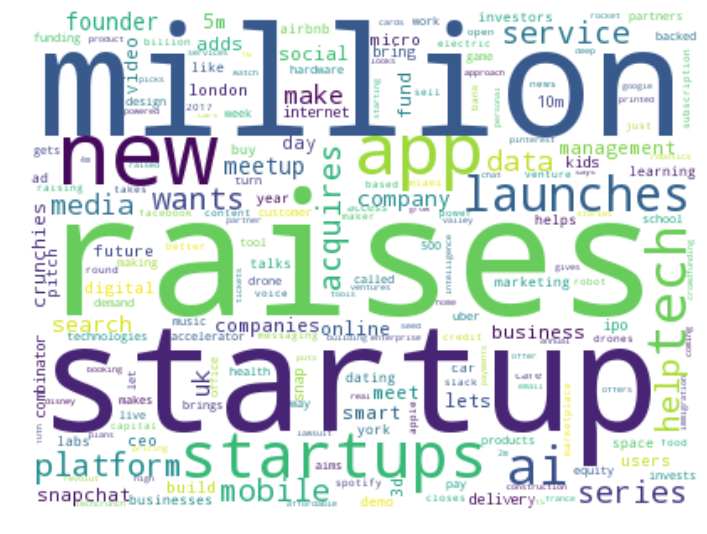

In [44]:
plt.figure(figsize=(12,9))
plt.imshow(cloud)
plt.axis('off')
plt.show()

## 상관 행렬 만들기 

In [50]:
tdm.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

<img src="1.PNG">

matrix([[1,1, 0, 0], <br>
        [0, 0, 1, 1]], dtype=int64) 
        
- 이런 형태로 만들어 진다. 

In [51]:
word_corr = np.corrcoef(tdm.todense(), rowvar=0)

In [52]:
word_corr

array([[ 1.        , -0.00244462, -0.00244462, ..., -0.00459338,
        -0.00244462, -0.00244462],
       [-0.00244462,  1.        , -0.00346021, ..., -0.00650164,
        -0.00346021, -0.00346021],
       [-0.00244462, -0.00346021,  1.        , ..., -0.00650164,
        -0.00346021, -0.00346021],
       ..., 
       [-0.00459338, -0.00650164, -0.00650164, ...,  1.        ,
        -0.00650164, -0.00650164],
       [-0.00244462, -0.00346021, -0.00346021, ..., -0.00650164,
         1.        , -0.00346021],
       [-0.00244462, -0.00346021, -0.00346021, ..., -0.00650164,
        -0.00346021,  1.        ]])

In [53]:
edges = []
for i in range(len(words)):
    for j in range(i+1,len(words)):
        edges.append((words[i],words[j], word_corr[i,j]))

In [54]:
edges = sorted(edges, key=operator.itemgetter(2),reverse=True)

In [55]:
edge_list = [(word1, word2) for word1, word2, weight in edges]
weight_list = [weight for word1, word2, weight in edges]

In [56]:
import networkx

In [57]:
G = networkx.Graph()

In [58]:
edge_set = set()
for word1, word2, weight in edges:
    G.add_edge(word1, word2, weight=weight)
    edge_set.add((word1,word2))

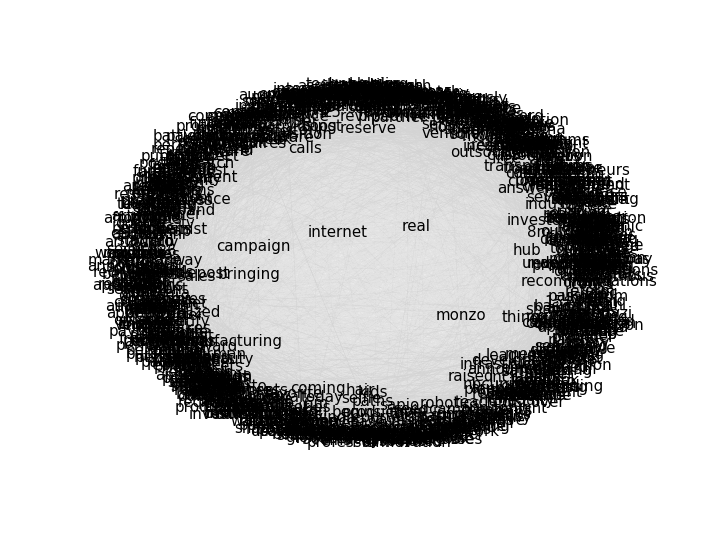

In [59]:
position = networkx.spring_layout(G, k=0.09,  iterations=100)
plt.figure(figsize=(12, 9))
networkx.draw_networkx_nodes(G, position, node_size=0)
networkx.draw_networkx_edges(G, position, edgelist=edge_list, width=weight_list, edge_color='lightgray')
networkx.draw_networkx_labels(G, position, font_size=15)
plt.axis('off')
plt.show()